# Capstone Project (the first attempt)

##### Note: This is my first attempt with the data for the purpose of this homework. I haven't done much EDA - which I plan as a part of my final project

### Dataset: HR Analytics, Source: Kaggle

### Key Questions: 
+ Understand why some of their best and most experienced employees are leaving prematurely. 
+ Predict which valuable employees will leave next.

### Fields in the dataset include:

+ Employee satisfaction level
+ Last evaluation
+ Number of projects
+ Average monthly hours
+ Time spent at the company
+ Whether they have had a work accident
+ Whether they have had a promotion in the last 5 years
+ Department
+ Salary
+ Whether the employee has left

### Read Data, some EDA...

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('HR_comma_sep.csv')

In [111]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [112]:
df.shape

(14999, 10)

In [113]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [115]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [116]:
df = df.join(pd.get_dummies(df['sales'], prefix = 'sales_'))

In [117]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [118]:
df['salary'] = df['salary'].replace({'low':0, 'medium':1, 'high': 2})

In [119]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary',
 'sales__IT',
 'sales__RandD',
 'sales__accounting',
 'sales__hr',
 'sales__management',
 'sales__marketing',
 'sales__product_mng',
 'sales__sales',
 'sales__support',
 'sales__technical']

In [136]:
X = df[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'sales__IT',
 'sales__RandD',
 'sales__accounting',
 'sales__hr',
 'sales__management',
 'sales__marketing',
 'sales__product_mng',
 'sales__sales',
 'sales__technical']]
y = df.left

Axes(0.125,0.125;0.62x0.755)


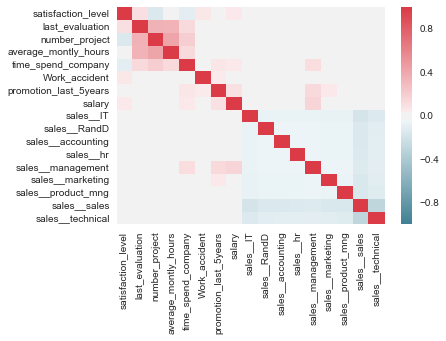

In [188]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'sales__IT', 'sales__RandD',
 'sales__accounting', 'sales__hr', 'sales__management', 'sales__marketing', 'sales__product_mng', 'sales__sales',
 'sales__technical']].corr() 
#print correlations
print sns.heatmap(correlations, cmap=cmap)

In [247]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, cross_validation, preprocessing, grid_search
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score

In [168]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =0)

### DECISION TREE CLASSIFIER

In [216]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [217]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [191]:
#confusion_matrix(y_train, model.predict(X_train))
confusion_matrix(y_test, model.predict(X_test))

array([[4565,   66],
       [ 116, 1253]])

In [225]:
dt_roc_auc_score = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), average = 'micro')
dt_roc_auc_score 

0.98269125000000002

In [226]:
dt_score = model.score(X_test, y_test)
dt_score 

0.96966666666666668

In [220]:
#kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)
#scores = []
#for train_index, test_index in kf:    
#    model = tree.DecisionTreeClassifier().fit(df.iloc[train_index], y.iloc[train_index])
#    scores.append(metrics.mean_squared_error(y.iloc[test_index], model.predict(df.iloc[test_index])))
#print np.mean(scores)

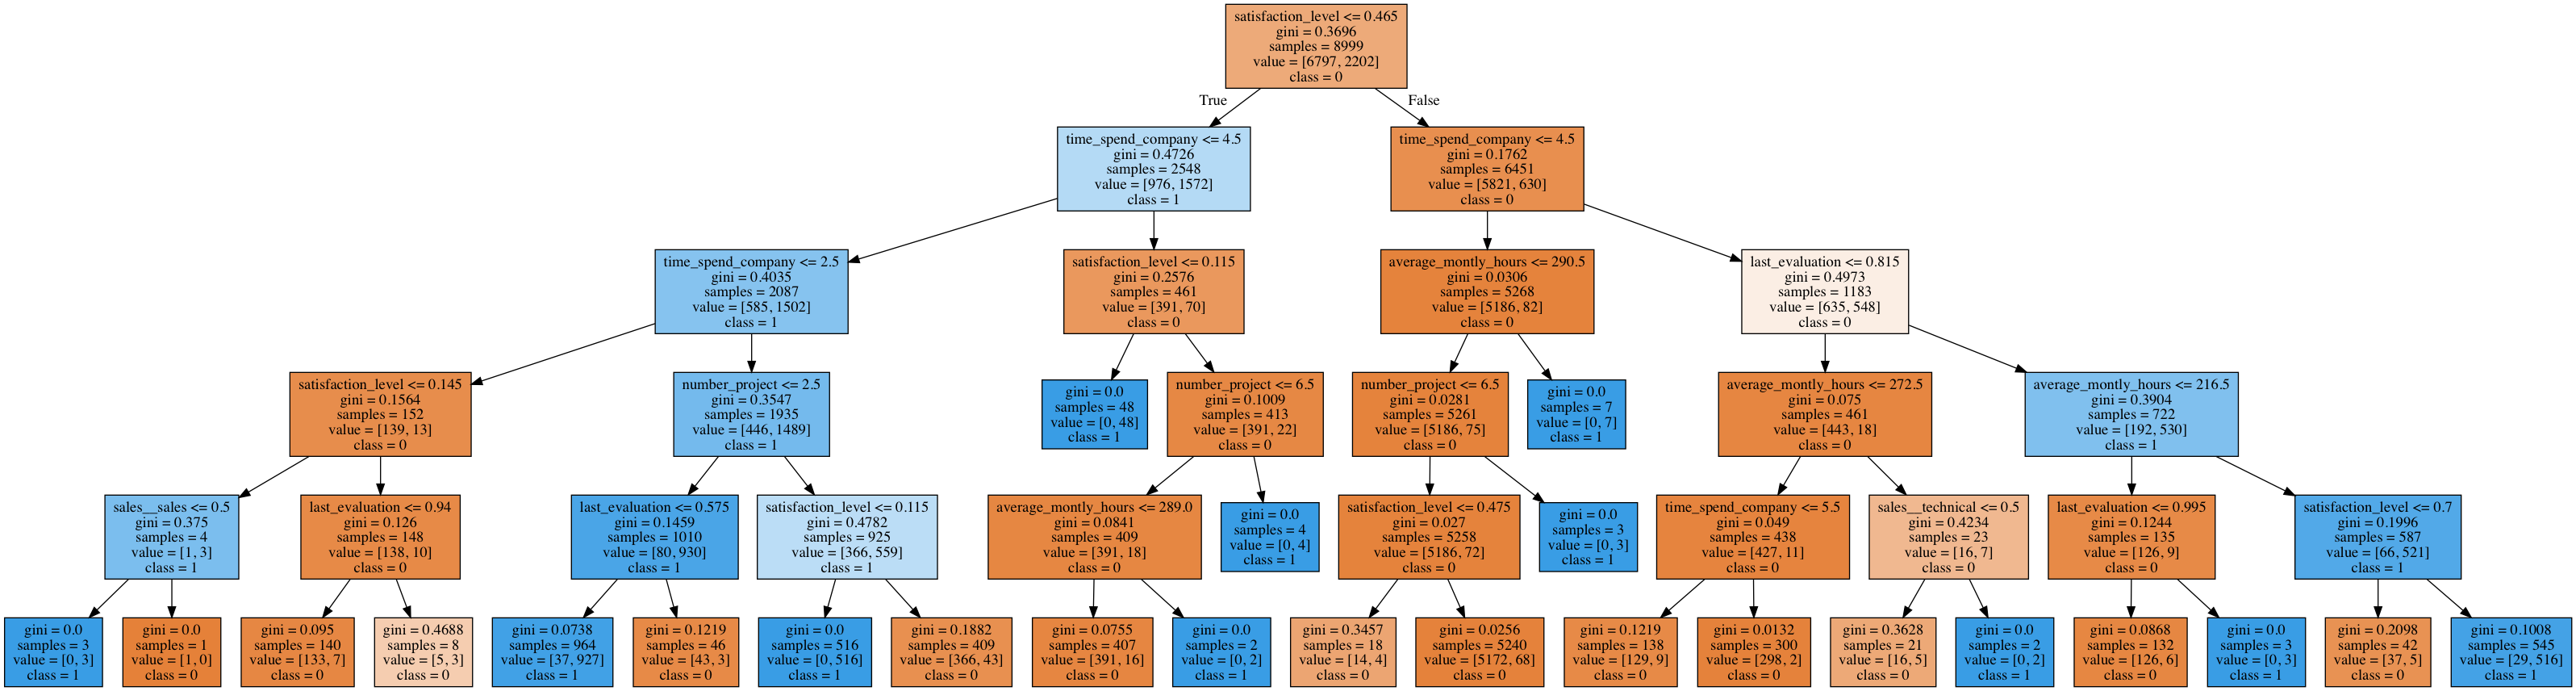

In [193]:
#Plotting Decision Tree
from IPython import display
from sklearn import datasets, tree, utils
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree

tree_model = model

# Generate a plot of the decision tree
dot_data = StringIO() 
tree.export_graphviz(tree_model, 
                     class_names =y_train.apply(str).tolist(),
                     feature_names = X.columns.tolist(), out_file=dot_data, 
                    filled=True, )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

display.Image(graph.create_png())

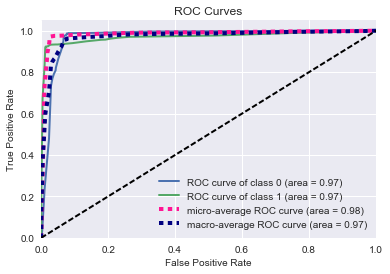

In [194]:
#Plotting ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt
from scikitplot import classifier_factory
classifier_factory(model)
model.plot_roc_curve(X_test.as_matrix(), y_test, random_state=2)
plt.show()

### RANDOM FOREST CLASSIFIER

In [195]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 20)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [196]:
model2.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [197]:
confusion_matrix(y_test, model.predict(X_test))

array([[4565,   66],
       [ 116, 1253]])

In [267]:
rf_roc_auc_score = roc_auc_score(pd.get_dummies(y_test), model2.predict_proba(X_test), average = 'micro')
rf_roc_auc_score

0.99439397222222226

In [240]:
rf_score = model2.score(X_test, y_test)
rf_score


0.98733333333333329

In [199]:
features = X.columns
feature_importances = model2.feature_importances_ 

features_df = pd.DataFrame({'Features' : features, 'Feature Importance' : feature_importances})

In [200]:
features_df.sort_values(by='Feature Importance', ascending = False, inplace = True)

In [201]:
features_df

,Feature Importance,Features
0,0.347950,satisfaction_level
4,0.191341,time_spend_company
2,0.160449,number_project
3,0.145895,average_montly_hours
1,0.115187,last_evaluation
7,0.010485,salary
5,0.009836,Work_accident
15,0.003751,sales__sales
16,0.003577,sales__technical
10,0.001797,sales__accounting


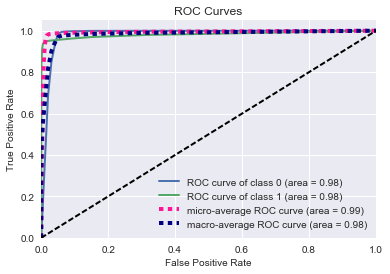

In [208]:
#Plotting ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt
from scikitplot import classifier_factory
classifier_factory(model2)
model2.plot_roc_curve(X_test.as_matrix(), y_test, random_state=2)
plt.show()

### LOGISTIC REGRESSION

In [202]:
from sklearn.linear_model import LogisticRegression

In [203]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
model3.coef_
model3.intercept_

array([ 0.51885753])

In [205]:
confusion_matrix (y_test, model3.predict(X_test))

array([[4280,  351],
       [ 878,  491]])

In [231]:
lr_roc_auc_score = roc_auc_score(pd.get_dummies(y_test), model3.predict_proba(X_test), average = 'micro')
lr_roc_auc_score

0.88555952777777791

In [232]:
lr_score = model3.score(X_test, y_test)
lr_score

0.79516666666666669

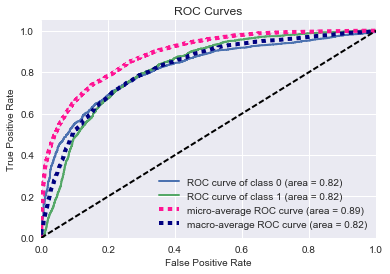

In [209]:
#Plotting ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt
from scikitplot import classifier_factory
classifier_factory(model3)
model3.plot_roc_curve(X_test.as_matrix(), y_test, random_state=2)
plt.show()

### KNN CLASSFIER

In [255]:
k = range(2, 50)
params = {'n_neighbors' : k ,'weights' : ['uniform', 'distance']} 
kf = cross_validation.KFold(len(df), n_folds = 10)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,)
gs.fit(X,y)
gs.grid_scores_
print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.959863990933
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')


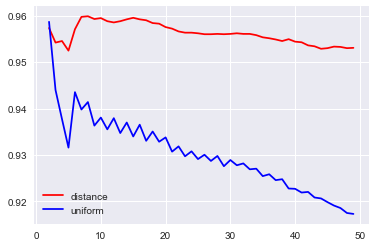

In [256]:
line_up, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2]], color='red', label='distance')
line_down, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2]], color='blue', label = 'uniform')
plt.legend(handles=[line_up, line_down])
plt.show()

In [258]:
model4 = neighbors.KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
model4.fit (X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [259]:
confusion_matrix(y_test, model4.predict(X_test))

array([[4422,  209],
       [  54, 1315]])

In [261]:
knn_score = model4.score(X_test, y_test)
knn_score

0.95616666666666672

In [264]:
knn_roc_auc_score = roc_auc_score(pd.get_dummies(y_test), model4.predict_proba(X_test), average = 'micro')
knn_roc_auc_score

0.98378630555555568

### COMPARING ALL THE MODELS

In [265]:
models = pd.DataFrame({'Models' : ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN'], 
                      'ROC AUC Score' : [dt_roc_auc_score, rf_roc_auc_score, lr_roc_auc_score, knn_roc_auc_score],
                      'Accuracy Score' : [dt_score, rf_score, lr_score, knn_score]})
models = models[['Models', 'ROC AUC Score', 'Accuracy Score']]
models.sort_values(by= 'ROC AUC Score', ascending = False)

,Models,ROC AUC Score,Accuracy Score
1,Random Forest,0.987333,0.987333
3,KNN,0.983786,0.956167
0,Decision Tree,0.982691,0.969667
2,Logistic Regression,0.885560,0.795167
